In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wd
from ipywidgets import interact
import seaborn as sns
#import ptitprince as pt
import re #I import this library 'cause I need to deal with regular expressions
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
#from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
sns.set_style('whitegrid')
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from category_encoders import TargetEncoder
from sklearn.preprocessing import PolynomialFeatures

## Flujo de Tareas:

### Parte I: Preparación y Análisis Inicial

1. **Elección del Modelo de Lenguaje Natural y/o Librería:** 
   - La librería escogida fue Stanza, modelo de lenguaje natural de Stanford, debido al número de idiomas que soporta y su capacidad de manejar pipelines complejos.

2. **Carga del Dataset:** 
   - Cargar el conjunto de datos en el entorno de trabajo para su análisis.

3. **Extracción de Entidades (`ents`) del Dataset:** 
   - Utilizar Stanza para identificar y extraer entidades nombradas relevantes en el dataset.

4. **Creación de Lista de Términos Asociados a Derechos Humanos:** 
   - Definir y compilar una lista de términos clave relacionados con los derechos humanos para su posterior búsqueda en el texto.

5. **Extracción de Oraciones que Contienen Términos sobre Derechos Humanos:** 
   - Localizar y extraer oraciones del dataset que incluyan los términos de la lista creada en el paso anterior.

6. **Análisis Exploratorio de Sentimiento en las Oraciones Extraídas:** 
   - Realizar un análisis preliminar de sentimiento sobre las oraciones extraídas para obtener una primera impresión del tono y la naturaleza de las discusiones sobre derechos humanos.

### Parte II: Análisis y Visualización

1. **Extracción de una Muestra de Textos:** 
   - Seleccionar una muestra representativa de textos del dataset completo para análisis más detallados.

2. **Creación de una Nube de Palabras de los Textos de la Muestra:** 
   - Generar una nube de palabras para visualizar las palabras más frecuentes en los textos seleccionados.

3. **Extracción de las Palabras y Entidades más Frecuentes en la Muestra:** 
   - Identificar y listar las palabras y entidades que aparecen con mayor frecuencia en la muestra de textos.

4. **Uso de Función para Extraer Relaciones Sujeto-Acción-Objeto:** 
   - Aplicar una función específica para detectar y extraer estructuras de relaciones Sujeto-Acción-Objeto (SAO) de los textos para entender mejor las acciones y los agentes involucrados en el contexto de derechos humanos.


In [2]:
import stanza
stanza.download('es')


2024-04-11 14:43:25 INFO: Downloaded file to C:\Users\jlsan\stanza_resources\resources.json
2024-04-11 14:43:25 INFO: Downloading default packages for language: es (Spanish) ...
2024-04-11 14:43:27 INFO: File exists: C:\Users\jlsan\stanza_resources\es\default.zip
2024-04-11 14:43:30 INFO: Finished downloading models and saved to C:\Users\jlsan\stanza_resources


In [3]:
main_file="C:/Users/jlsan/OneDrive/JEP_LARGE_DATASET/DATA.csv"
data=pd.read_csv(main_file)
pd.set_option('display.max_colwidth', None)

In [4]:
data_df=pd.DataFrame(data)
data_df.head(1)

INDEX  \
0  A001-00   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [5]:
nlp = stanza.Pipeline('es')


2024-04-11 14:43:47 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-04-11 14:43:48 INFO: Downloaded file to C:\Users\jlsan\stanza_resources\resources.json
2024-04-11 14:43:49 INFO: Loading these models for language: es (Spanish):
| Processor    | Package         |
----------------------------------
| tokenize     | ancora          |
| mwt          | ancora          |
| pos          | ancora_charlm   |
| lemma        | ancora_nocharlm |
| constituency | combined_charlm |
| depparse     | ancora_charlm   |
| sentiment    | tass2020_charlm |
| ner          | conll02         |

2024-04-11 14:43:49 INFO: Using device: cpu
2024-04-11 14:43:49 INFO: Loading: tokenize
2024-04-11 14:43:50 INFO: Loading: mwt
2024-04-11 14:43:50 INFO: Loading: pos
2024-04-11 14:43:50 INFO: Loading: lemma
2024-04-11 14:43:50 INFO: Loading: constituency
2024-04-11 14:43:51 INFO: Loading: depparse
2024-04-11 14:43:51 INFO: Loading: sentiment
2024-04-11 14:43:51 INFO: Loading: ner
2024-04-11 14:43:52 INFO: Done loading processors!


In [6]:
len(data_df)

35737

## Función para extracción de entidades

In [7]:
def ent_extractor(doc):
    ent_nlp = nlp(doc)
    ext_ent = [(ent.text, ent.type) for ent in ent_nlp.ents]
    return ext_ent
#data_df['entidades'] = data_df['TEXT'].apply(ent_extractor)
primer_registro_entidades = ent_extractor(data_df['TEXT'].iloc[0])


In [8]:
primer_registro_entidades

[('Lorenza Díaz Padilla', 'PER'),
 ('Hospital San Jerónimo', 'ORG'),
 ('Montería', 'LOC'),
 ('Magistrado Sustanciador', 'PER'),
 ('Dr', 'PER'),
 ('JOSÉ GREGORIO HERNÁNDEZ', 'PER'),
 ('Santafé de Bogotá D.C.', 'LOC'),
 ('I. ANTECEDENTES', 'MISC'),
 ('San Jerónimo', 'LOC'),
 ('Montería', 'LOC'),
 ('Hospital', 'ORG'),
 ('Empresa Social del Estado', 'ORG'),
 ('Hospital San Jerónimo de Montería', 'ORG'),
 ('DECISION JUDICIAL', 'MISC'),
 ('Tribunal Superior del Distrito Judicial de Montería -Sala Civil Familia-',
  'ORG'),
 ('Lorenza Díaz Padilla', 'PER'),
 ('Sala Quinta de Revisión de la Corte Constitucional', 'ORG'),
 ('Constitución', 'MISC'),
 ('Tribunal Superior del Distrito Judicial de Montería', 'ORG'),
 ('ABSTENERSE', 'ORG'),
 ('Tribunal Superior de Montería', 'ORG'),
 ('Secretaría General de esta Corporación', 'ORG'),
 ('Sala Civil', 'ORG'),
 ('Familia del Tribunal Superior de Montería', 'ORG'),
 ('Sala', 'ORG'),
 ('Gaceta de la Corte Constitucional', 'ORG'),
 ('JOSE GREGORIO HERNAND

In [9]:
segundo_registro_entidades = ent_extractor(data_df['TEXT'].iloc[1])

In [10]:
segundo_registro_entidades

[('Corte', 'ORG'),
 ('INHIBICION DE LA CORTE CONSTITUCIONAL-Resolución', 'MISC'),
 ('Sentencia C-1063', 'MISC'),
 ('Leoncio Ceballos', 'PER'),
 ('Magistrada Ponente', 'PER'),
 ('Dra', 'PER'),
 ('CRISTINA PARDO', 'PER'),
 ('Bogotá', 'LOC'),
 ('Corte Constitucional de la República de Colombia', 'ORG'),
 ('Fabio Morón Díaz', 'PER'),
 ('Eduardo Montealegre Lynett', 'PER'),
 ('Alfredo Beltrán Sierra', 'PER'),
 ('Martha Sáchica de Moncaleano', 'PER'),
 ('Carlos Gaviria Díaz', 'PER'),
 ('José Gregorio Hernández Galindo', 'PER'),
 ('Alejandro Martínez Caballero', 'PER'),
 ('Cristina Pardo Schlesinger', 'PER'),
 ('Álvaro Tafur Gálvi', 'PER'),
 ('AUTO', 'MISC'),
 ('Leoncio Ceballos Valencia', 'PER'),
 ('Sentencia C-1063', 'MISC'),
 ('Corte Constitucional', 'ORG'),
 ('articulo 1', 'MISC'),
 ('Decreto 085', 'MISC'),
 ('L', 'LOC'),
 ('artículo 49', 'MISC'),
 ('Decreto 2067', 'MISC'),
 ('Corte', 'ORG'),
 ('Corporación', 'ORG'),
 ('Corte Constitucional', 'ORG'),
 ('Corte Constitucional', 'ORG'),
 ('C

## PARTE 1: ANÁLISIS DE SENTIMIENTO A PARTIR DE TÉRMINOS ASOCIADOS A DERECHOS HUMANOS PRESENTES EN LOS ACTOS

## Lista de términos asociados a derechos humanos indentificados

Fuente: https://www.defensoria.gov.co/documents/20123/1647651/glosario_PyD_V9_250722.pdf/5cc87729-560d-f530-6948-ba3644faed08?t=1660750985295

In [11]:
terminos_derechos_humanos = [
    'derechos humanos', 'libertad de expresión', 'igualdad de género', 'discriminación', 
    'trabajo infantil', 'asilo', 'refugiados', 'debido proceso', 'libertad de asociación', 
    'libre pensamiento', 'libertad de culto', 'seguridad personal', 'desaparecido', 
    'intimidad', 'libertad de opinión', 'no discriminación', 'libertad sindical'
]


## Función para extracción de oraciones contenedoras de términos asociados a derechos humanos

In [12]:
def sentence_finder(textos):  
    mark_sentences = []
    for idx,texto in textos:  
        doc = nlp(texto)
        for sentencia in doc.sentences:  
            text_sentence = sentencia.text.lower() 
            if any(term in text_sentence for term in terminos_derechos_humanos):  
                mark_sentences.append((idx,sentencia.text))  
    return mark_sentences


## Extracción de ids y oraciones a nuevo dataframe

In [13]:
txt_id=list(zip(data_df.index,data_df['TEXT']))

In [14]:
size = 5
all_results = []

for i in range(0, 10, size):
    end = i + size
    batch = txt_id[i:end]
    processed_batch = sentence_finder(batch)
    all_results.extend(processed_batch)


size=5
results=[]

for i in range(0,10,size):
    end=i+size
    batch=data_df['TEXT'].iloc[i:end].tolist()
    processed_batch=sentence_finder(batch)
    results.extend(processed_batch)


    
    

In [15]:
df_oraciones_encontradas = pd.DataFrame(all_results, columns=['ID_Documento', 'Oración'])

In [16]:
df_oraciones_encontradas

,ID_Documento,Oración
0,0,DEBIDO PROCESO DE TUTELA-Notificación iniciación de la acción
1,0,"Si bien el trámite propio de la acción de tutela es breve, sumario e informal, toda vez que busca la protección inmediata de un derecho fundamental cuando quiera que éste se vea amenazado o vulnerado por la acción u omisión de una autoridad pública o de un particular en los casos expresamente señalados, no puede llevarse a cabo el proceso sin el conocimiento de la autoridad o del particular contra quien se impetró, pues de lo contrario se le estaría vulnerando en forma flagrante su derecho a la defensa y por ende al debido proceso."
2,0,"Si bien el trámite propio de la acción de tutela es breve, sumario e informal, toda vez que busca la protección inmediata de un derecho fundamental cuando quiera que éste se vea amenazado o vulnerado por la acción u omisión de una autoridad pública o de un particular en los casos expresamente señalados, no puede llevarse a cabo el proceso sin el conocimiento de la autoridad o del particular contra quien se impetró, pues de lo contrario se le estaría vulnerando en forma flagrante su derecho a la defensa y por ende al debido proceso."
3,1,"La Corte recuerda que, en asuntos de constitucionalidad, la nulidad de una sentencia será siempre un asunto extraordinario que pueda producirse en uno de los dos momentos: en el del trámite procesal, o en el de la sentencia misma, y en ambos casos por violación del debido proceso."
4,1,"En efecto, con fundamento en ese artículo, la Corte ha admitido solicitudes de nulidad de procesos de constitucionalidad, no sólo por actuaciones o hechos ocurridos antes de dictarse el fallo sino también por irregularidades en la sentencia misma, siempre y cuando éstas impliquen violación del debido proceso, pues esta Corporación ha precisado que tiene ""el deber de declarar las nulidades que se presenten en cualquier etapa del proceso."
5,1,"""Lo dicho no ha sido obstáculo para que la misma Corte, dando aplicación directa al artículo 29 de la Carta Política, haya admitido que puede darse excepcionalmente en sus sentencias la posibilidad de violaciones del debido proceso, durante el trámite judicial correspondiente o en el momento de dictarse, por lo cual, si ello se prueba y establece de manera contundente, tiene lugar la nulidad del respectivo fallo (Cfr."
6,1,"""Dispone el precepto legal que sólo las irregularidades que impliquen violación del debido proceso podrán servir de base para que la Sala Plena de la Corte anule el proceso."
7,1,"Se trata de situaciones jurídicas especialísimas y excepcionales, que tan sólo pueden provocar la nulidad del proceso cuando los fundamentos expuestos por quien la alega muestran, de manera indudable y cierta, que las reglas procesales aplicables a los procesos constitucionales, que no son otras que las previstas en los decretos 2067 y 2591 de 1991, han sido quebrantadas, con notoria y flagrante vulneración del debido proceso."
8,1,"Toda sentencia desfavorable disgusta y molesta a quien no fue beneficiado por la decisión que contiene, pero de esa molestia y disgusto no puede deducirse irresponsablemente una vulneración del debido proceso por el sólo hecho de que se trata de una providencia definitiva contra la cual no cabe ningún recurso""."
9,1,"Conforme con lo anterior, la Corte recuerda que, en asuntos de constitucionalidad, la nulidad de una sentencia será siempre un asunto extraordinario que pueda producirse en uno de los dos momentos: en el del trámite procesal, o en el de la sentencia misma, y en ambos casos por violación del debido proceso."


## Función para análisis de sentimiento de oraciones encontradas

In [34]:
def analyze_text(texto):
    auto = nlp(texto)
    sentiments = []
    entities = []
    
    for sentence in auto.sentences:
        sentiments.append(sentence.sentiment)  # Añade el sentimiento de la oración
        for entity in sentence.ents:
            entities.append((entity.text, entity.type))  # Añade la entidad y su tipo
    
    return sentiments, entities

In [35]:
df_oraciones_encontradas['analysis_results'] = df_oraciones_encontradas['Oración'].apply(analyze_text)

In [36]:
df_oraciones_encontradas

,ID_Documento,Oración,analysis_results
0,0,DEBIDO PROCESO DE TUTELA-Notificación iniciación de la acción,"([1], [])"
1,0,"Si bien el trámite propio de la acción de tutela es breve, sumario e informal, toda vez que busca la protección inmediata de un derecho fundamental cuando quiera que éste se vea amenazado o vulnerado por la acción u omisión de una autoridad pública o de un particular en los casos expresamente señalados, no puede llevarse a cabo el proceso sin el conocimiento de la autoridad o del particular contra quien se impetró, pues de lo contrario se le estaría vulnerando en forma flagrante su derecho a la defensa y por ende al debido proceso.","([0], [])"
2,0,"Si bien el trámite propio de la acción de tutela es breve, sumario e informal, toda vez que busca la protección inmediata de un derecho fundamental cuando quiera que éste se vea amenazado o vulnerado por la acción u omisión de una autoridad pública o de un particular en los casos expresamente señalados, no puede llevarse a cabo el proceso sin el conocimiento de la autoridad o del particular contra quien se impetró, pues de lo contrario se le estaría vulnerando en forma flagrante su derecho a la defensa y por ende al debido proceso.","([0], [])"
3,1,"La Corte recuerda que, en asuntos de constitucionalidad, la nulidad de una sentencia será siempre un asunto extraordinario que pueda producirse en uno de los dos momentos: en el del trámite procesal, o en el de la sentencia misma, y en ambos casos por violación del debido proceso.","([0], [(Corte, ORG)])"
4,1,"En efecto, con fundamento en ese artículo, la Corte ha admitido solicitudes de nulidad de procesos de constitucionalidad, no sólo por actuaciones o hechos ocurridos antes de dictarse el fallo sino también por irregularidades en la sentencia misma, siempre y cuando éstas impliquen violación del debido proceso, pues esta Corporación ha precisado que tiene ""el deber de declarar las nulidades que se presenten en cualquier etapa del proceso.","([0], [(Corte, ORG), (Corporación, ORG)])"
5,1,"""Lo dicho no ha sido obstáculo para que la misma Corte, dando aplicación directa al artículo 29 de la Carta Política, haya admitido que puede darse excepcionalmente en sus sentencias la posibilidad de violaciones del debido proceso, durante el trámite judicial correspondiente o en el momento de dictarse, por lo cual, si ello se prueba y establece de manera contundente, tiene lugar la nulidad del respectivo fallo (Cfr.","([0], [(Corte, ORG), (artículo 29, MISC), (Carta Política, MISC), (Cfr, ORG)])"
6,1,"""Dispone el precepto legal que sólo las irregularidades que impliquen violación del debido proceso podrán servir de base para que la Sala Plena de la Corte anule el proceso.","([0], [(Sala Plena de la Corte, ORG)])"
7,1,"Se trata de situaciones jurídicas especialísimas y excepcionales, que tan sólo pueden provocar la nulidad del proceso cuando los fundamentos expuestos por quien la alega muestran, de manera indudable y cierta, que las reglas procesales aplicables a los procesos constitucionales, que no son otras que las previstas en los decretos 2067 y 2591 de 1991, han sido quebrantadas, con notoria y flagrante vulneración del debido proceso.","([0], [])"
8,1,"Toda sentencia desfavorable disgusta y molesta a quien no fue beneficiado por la decisión que contiene, pero de esa molestia y disgusto no puede deducirse irresponsablemente una vulneración del debido proceso por el sólo hecho de que se trata de una providencia definitiva contra la cual no cabe ningún recurso"".","([0], [])"
9,1,"Conforme con lo anterior, la Corte recuerda que, en asuntos de constitucionalidad, la nulidad de una sentencia será siempre un asunto extraordinario que pueda producirse en uno de los dos momentos: en el del trámite procesal, o en el de la sentencia misma, y en ambos casos por violación del debido proceso.","([0], [(Corte, ORG)])"


## Cálculo de frecuencias de sentimientos según oraciones para visualizar

In [37]:
all_sentiments = [sentiment for result in df_oraciones_encontradas['analysis_results'] for sentiment in result[0]]
sentiment_counts = Counter(all_sentiments)


total = sum(sentiment_counts.values())
sentiment_distribution = {sent: count / total for sent, count in sentiment_counts.items()}


In [39]:
all_entities = [entity for result in df_oraciones_encontradas['analysis_results'] for entity in result[1]]
entity_counts = Counter(all_entities)


most_common_entities = entity_counts.most_common(10)  


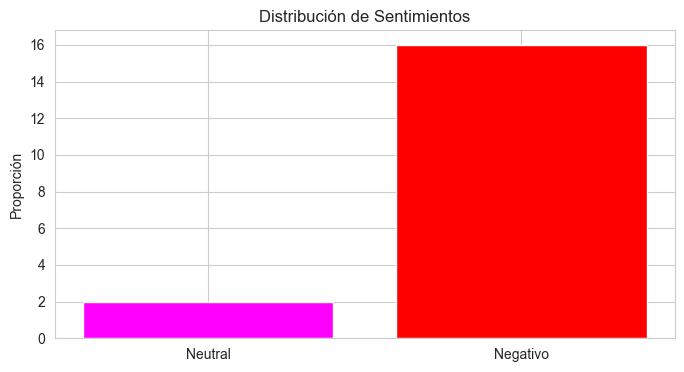

In [40]:
sentiments = list(sentiment_counts.keys())  
counts = list(sentiment_counts.values())


sentiment_labels = {0: 'Negativo', 1: 'Neutral', 2: 'Positivo'}

# Aplicando el mapeo a los sentimientos actuales para obtener las etiquetas correctas
labels = [sentiment_labels[sent] for sent in sentiments if sent in sentiment_labels]

plt.figure(figsize=(8, 4))
plt.bar(range(len(sentiments)), counts, color=['magenta', 'red', 'green'])
plt.title('Distribución de Sentimientos')
plt.xticks(range(len(sentiments)), labels) 
plt.ylabel('Proporción')
plt.show()


## PARTE 2 EXTRACCIÓN DE SUJETOS ACCIONES Y OBJETOS

## EXTRACCIÓN DE MUESTRA PARA PROBAR EL ANÁLISIS

In [17]:
sample=data_df['TEXT'].iloc[0:10]
text_concat=''.join(sample)



In [41]:
from wordcloud import STOPWORDS
from wordcloud import WordCloud

#Se añaden stopwords para que no aparezcan artículos y demás en los conteos
stopwords = set(STOPWORDS)
stopwords.update(['al', 'el', 'para', 'en','cuando','por','lo','la','ella'])


wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text_concat)


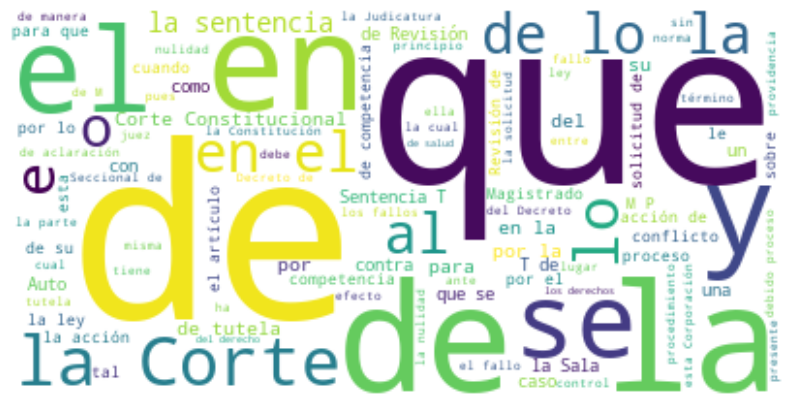

In [20]:
# Crear la nube de palabras
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue')

# Generar la nube de palabras a partir del texto_concatenado
wordcloud.generate(text_concat)

# Mostrar la nube de palabras usando matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar los ejes para una mejor visualización
plt.show()


## Uso de stopwords para extracción de las palabras más frecuentes en los autos con el fin de establecer relaciones

In [42]:
import nltk
from nltk.corpus import stopwords
import string


nltk.download('stopwords')


stop_words = set(stopwords.words('spanish'))
stop_words.update(string.punctuation)
stop_words.update(map(str, range(100)))


stop_words.update(['—', '“', '”', '…'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jlsan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
def extraer_tokens_y_entidades(texto):
    doc_tok = nlp(texto)
    tokens = [word.text.lower() for sent in doc_tok.sentences for word in sent.words if word.text.lower() not in stop_words]
    
    entidades = [ent.text.lower() for ent in doc_tok.ents]
    return tokens, entidades


resultados = sample.apply(extraer_tokens_y_entidades)


In [24]:
from collections import Counter
conteo_tokens = Counter()
conteo_entidades = Counter()

for tokens, entidades in resultados:
    conteo_tokens.update(tokens)
    conteo_entidades.update(entidades)

# Obtiene las palabras (o entidades) más frecuentes
palabras_mas_frecuentes = conteo_tokens.most_common(50)
entidades_mas_frecuentes = conteo_entidades.most_common(50)

In [25]:
entidades_mas_frecuentes

[('corte', 53),
 ('corte constitucional', 33),
 ('corporación', 21),
 ('constitución', 17),
 ('sala', 13),
 ('magistrado ponente', 12),
 ('sala disciplinaria', 12),
 ('bogotá', 11),
 ('decreto 2067', 9),
 ('dr', 8),
 ('consejo seccional de la judicatura del atlántico', 8),
 ('sentencia t-951', 8),
 ('marco gerardo', 7),
 ('artículo 1º', 6),
 ('martha victoria', 6),
 ('corte suprema de justicia', 6),
 ('gaceta de la corte constitucional', 5),
 ('sentencia c-1063', 5),
 ('alfredo beltrán sierra', 5),
 ('josé gregorio hernández galindo', 5),
 ('decreto 085', 5),
 ('sentencia', 5),
 ('sala plena de la corte constitucional', 5),
 ('código de procedimiento civil', 5),
 ('marco gerardo monroy cabra', 5),
 ('consejo seccional de la judicatura de cundinamarca', 5),
 ('sentencia t-829', 5),
 ('policía nacional', 5),
 ('eduardo montealegre lynett', 4),
 ('auto', 4),
 ('artículo 49', 4),
 ('constitución política', 4),
 ('cfr', 4),
 ('sala plena', 4),
 ('m.p. dr', 4),
 ('d.c.', 4),
 ('decreto 2591'

In [26]:
palabras_mas_frecuentes

[('corte', 139),
 ('sentencia', 96),
 ('sala', 79),
 ('constitucional', 72),
 ('tutela', 60),
 ('magistrado', 51),
 ('ley', 47),
 ('artículo', 46),
 ('auto', 45),
 ('proceso', 45),
 ('derecho', 42),
 ('revisión', 42),
 ('competencia', 42),
 ('nulidad', 39),
 ('fallo', 34),
 ('acción', 33),
 ('parte', 31),
 ('superior', 28),
 ('decreto', 28),
 ('decisión', 28),
 ('aclaración', 28),
 ('solicitud', 27),
 ('control', 26),
 ('corporación', 25),
 ('casos', 24),
 ('juez', 24),
 ('instancia', 23),
 ('caso', 22),
 ('constitución', 22),
 ('m.p.', 22),
 ('derechos', 21),
 ('procedimiento', 21),
 ('tal', 21),
 ('seccional', 21),
 ('2004', 21),
 ('bogotá', 20),
 ('general', 20),
 ('sierra', 20),
 ('ser', 20),
 ('sentencias', 20),
 ('manera', 20),
 ('lugar', 20),
 ('así', 20),
 ('salud', 20),
 ('consejo', 20),
 ('judicatura', 20),
 ('josé', 19),
 ('fallos', 19),
 ('conflicto', 19),
 ('debido', 18)]

In [27]:
palabras_mas_frecuentes[1][0]

'sentencia'

In [28]:
comunes_list=[tupla[0] for tupla in palabras_mas_frecuentes ]

In [29]:
comunes_list

['corte',
 'sentencia',
 'sala',
 'constitucional',
 'tutela',
 'magistrado',
 'ley',
 'artículo',
 'auto',
 'proceso',
 'derecho',
 'revisión',
 'competencia',
 'nulidad',
 'fallo',
 'acción',
 'parte',
 'superior',
 'decreto',
 'decisión',
 'aclaración',
 'solicitud',
 'control',
 'corporación',
 'casos',
 'juez',
 'instancia',
 'caso',
 'constitución',
 'm.p.',
 'derechos',
 'procedimiento',
 'tal',
 'seccional',
 '2004',
 'bogotá',
 'general',
 'sierra',
 'ser',
 'sentencias',
 'manera',
 'lugar',
 'así',
 'salud',
 'consejo',
 'judicatura',
 'josé',
 'fallos',
 'conflicto',
 'debido']

## Función para extraer hechos y buscar relaciones entre sujetos, acciones y objetos

In [30]:
def extractor_hechos(texto):
    facts_ext = nlp(texto)
    hechos = []
    
    for sent in facts_ext.sentences:
        for word in sent.words:
            
            if word.deprel == 'nsubj' and 'Person' in {ent.type for ent in sent.ents if ent.text == word.text}:
                accion = word.head.text
                sujeto = word.text
                objetos = [w.text for w in sent.words if w.head == word.head and w.deprel in ('obj', 'iobj')]
                
                for objeto in objetos:
                    hechos.append(f"{sujeto} {accion} {objeto}")
    return hechos


In [31]:
sample['hechos']=sample.apply(extractor_hechos)

In [33]:
sample['hechos']

0    []
1    []
2    []
3    []
4    []
5    []
6    []
7    []
8    []
9    []
Name: TEXT, dtype: object